In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
DATA_PATH = "data\googleplaystore.csv"
REVIEWS_PATH = "data\googleplaystore_user_reviews.csv"

# **General Look At the Data:**

In [3]:
#loading the data into a pandas dataframe 
df = pd.read_csv(DATA_PATH)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [36]:
#getting a general look into the data
print("Dataset Shape: ", df.shape)
df.count()

Dataset Shape:  (10841, 13)


App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

# **Interpretations for Category column:**

- There is no **Nan** for this column.
- The most frequent category is **Family**, followed by **Game** and **Tools**. The rest are pretty far away.
- The less frequent Categories are **Beauty**, **Parenting**,**Comics**. 
- There is an **anomally** which is category **"1.9"** which was probably a typo with the rating. This need cleaning.
- Average frequency: **318.85**. With Cleaning the anomally: **328.48**.
- Unique Categories: **34** with cleaning **33**.

In [100]:
#checkingt the number and the different categories
categories = sorted(df.Category.unique())
print(np.array(categories), end="\n\n")
print("Number of Unique Categories: ", len(categories))

df.groupby(["Category"]).count()

['1.9' 'ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FAMILY' 'FINANCE' 'FOOD_AND_DRINK' 'GAME' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'MAPS_AND_NAVIGATION'
 'MEDICAL' 'NEWS_AND_MAGAZINES' 'PARENTING' 'PERSONALIZATION'
 'PHOTOGRAPHY' 'PRODUCTIVITY' 'SHOPPING' 'SOCIAL' 'SPORTS' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']

Number of Unique Categories:  34


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
1.9,1,1,1,1,1,1,1,0,1,1,1,0
ART_AND_DESIGN,65,62,65,65,65,65,65,65,65,65,64,65
AUTO_AND_VEHICLES,85,73,85,85,85,85,85,85,85,85,85,85
BEAUTY,53,42,53,53,53,53,53,53,53,53,53,53
BOOKS_AND_REFERENCE,231,178,231,231,231,231,231,231,231,231,230,231
BUSINESS,460,303,460,460,460,460,460,460,460,460,460,460
COMICS,60,58,60,60,60,60,60,60,60,60,60,60
COMMUNICATION,387,328,387,387,387,387,387,387,387,387,387,387
DATING,234,195,234,234,234,234,234,234,234,234,234,234


In [33]:
#checking the weird category 1.9
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [98]:
#plotting the frequency of each category using a hiostogram 
data = df.groupby("Category").size()
data = data.to_numpy()
print("Frequencies: ", data, end="\n\n")
print("Categories: ", np.array(categories), end="\n\n")

avg_freq = df.groupby("Category").size().mean()
avg_freq_cln = df[df["Category"] != "1.9"].groupby("Category").size().mean()
print("Average Frequency: ", avg_freq, avg_freq_cln)

df.groupby("Category").size().sort_values()

Frequencies:  [   1   65   85   53  231  460   60  387  234  156  149   64 1972  366
  127 1144  341   88   85  382  137  463  283   60  392  335  424  260
  295  384  843  258  175   82]

Categories:  ['1.9' 'ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FAMILY' 'FINANCE' 'FOOD_AND_DRINK' 'GAME' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'MAPS_AND_NAVIGATION'
 'MEDICAL' 'NEWS_AND_MAGAZINES' 'PARENTING' 'PERSONALIZATION'
 'PHOTOGRAPHY' 'PRODUCTIVITY' 'SHOPPING' 'SOCIAL' 'SPORTS' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']

Average Frequency:  318.8529411764706 328.4848484848485


Category
1.9                       1
BEAUTY                   53
PARENTING                60
COMICS                   60
EVENTS                   64
ART_AND_DESIGN           65
WEATHER                  82
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
HOUSE_AND_HOME           88
FOOD_AND_DRINK          127
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           149
EDUCATION               156
VIDEO_PLAYERS           175
BOOKS_AND_REFERENCE     231
DATING                  234
TRAVEL_AND_LOCAL        258
SHOPPING                260
NEWS_AND_MAGAZINES      283
SOCIAL                  295
PHOTOGRAPHY             335
HEALTH_AND_FITNESS      341
FINANCE                 366
LIFESTYLE               382
SPORTS                  384
COMMUNICATION           387
PERSONALIZATION         392
PRODUCTIVITY            424
BUSINESS                460
MEDICAL                 463
TOOLS                   843
GAME                   1144
FAMILY                 1972
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_48256\3535546292.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


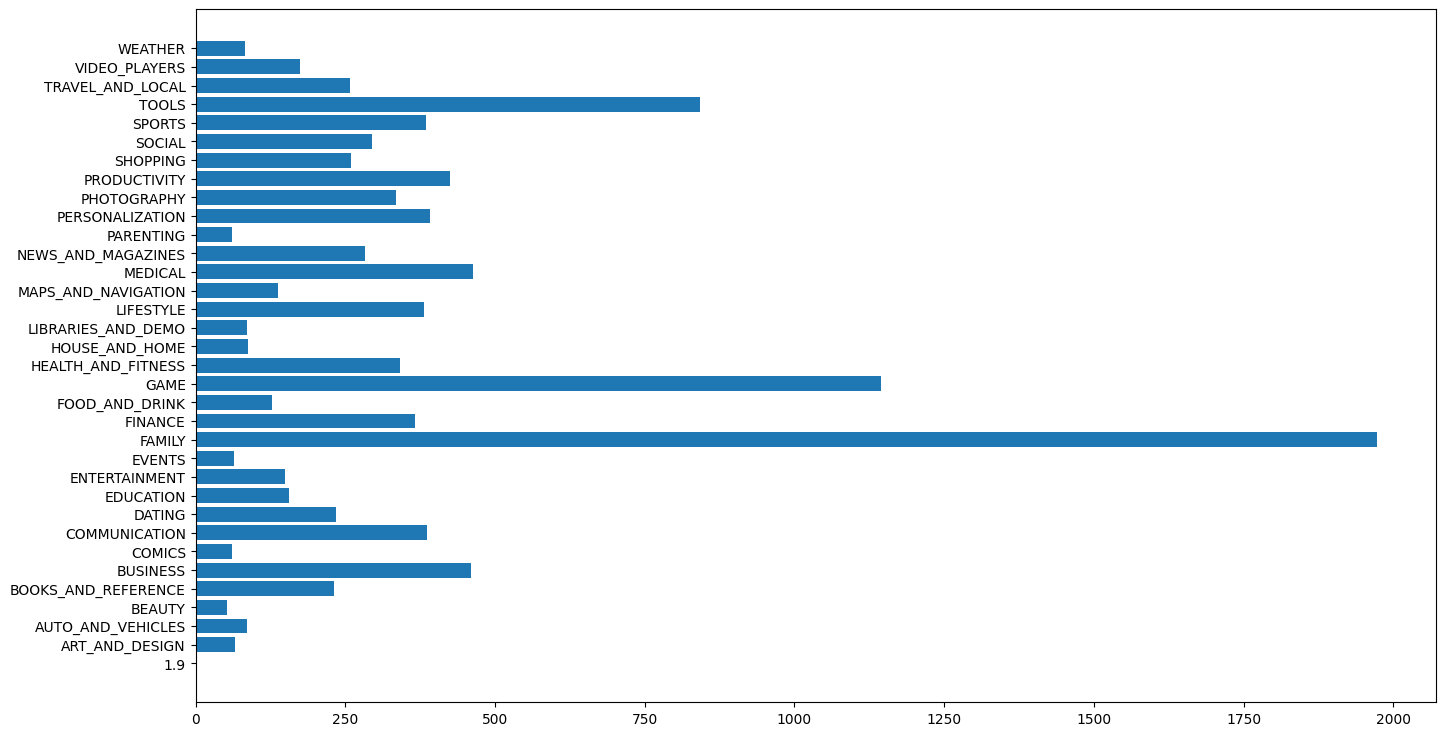

In [97]:
#Visualizing the frequency of each category
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(categories, data)

fig.show()

In [ ]:
#To Do: 
#Do similar univariate analysis for the rest of the columns
#Start a bivariate analysis to see how differnt features affect each others
